In [11]:
from pathlib import Path
import pandas as pd
import numpy as np

In [64]:
def count_words(text):
    return sum([1 for i in text.split() if len(i) > 0])


def cut_before_notes(text):
    idx = text.find("\nNotes")
    if idx == -1:
        return text
    return text[:idx]


paths = sorted(list(Path("/home/clay/research/kaggle/kaggle_llm/data/wikipedia_pages2/").glob("*")))
df = pd.concat([
    pd.read_parquet(p)
    for p in paths
])
df["title"] = df["title"].str.lower()
df["text"] = df["text"].apply(cut_before_notes)
df["wc"] = df["text"].apply(count_words)
df = df.sort_values("wc", ascending=False)

In [89]:
def begins_with_year(item):
    try:
        _ = int(item[:4])
    except:
        return False
    return len(item) > 5 and item[4] == " "


def is_year_in_something(item):
    try:
        _ = int(item[:4])
    except:
        return False
    return item[4:8] == " in "


def is_glossary(item):
    return "glossary" in item


def is_fiction(item):
    return "fiction" in item


def is_list_of(item):
    return item.startswith("list of")


def is_timeline_of(item):
    return item.startswith("timeline of")


def is_weather_of(item):
    return item.startswith("weather of")


def is_data_page(item):
    return "(data page)" in item


blacklist = list(df[
    (
        df["title"].apply(begins_with_year)
        | df["title"].apply(is_year_in_something)
        | df["title"].apply(is_list_of)
        | df["title"].apply(is_glossary)
        | df["title"].apply(is_fiction)
        | df["title"].apply(is_timeline_of)
        | df["title"].apply(is_weather_of)
        | df["title"].apply(is_data_page)
        | (df["wc"] < 100)
        | (df["wc"] > 5000)
    )
]["title"].values)
filtered_df = df[~df["title"].isin(blacklist)]
print(f"blacklisted: {len(blacklist)}/{len(df)} topics")

blacklisted: 20866/131049 topics


In [90]:
filtered_df["wc"].describe(percentiles=np.linspace(0, 1.0, 51))

count    110181.000000
mean        703.128597
std         792.548971
min         100.000000
0%          100.000000
2%          106.000000
4%          112.000000
6%          118.000000
8%          124.000000
10%         131.000000
12%         138.000000
14%         146.000000
16%         154.000000
18%         162.000000
20%         171.000000
22%         180.000000
24%         190.000000
26%         200.000000
28%         211.000000
30%         223.000000
32%         235.000000
34%         249.000000
36%         263.000000
38%         278.000000
40%         295.000000
42%         313.000000
44%         331.000000
46%         351.000000
48%         372.000000
50%         394.000000
52%         419.000000
54%         445.000000
56%         473.000000
58.0%       502.000000
60%         533.000000
62%         568.000000
64%         605.000000
66%         646.000000
68%         690.000000
70%         738.000000
72%         790.000000
74%         846.000000
76%         908.000000
78%        

(1035, 4)


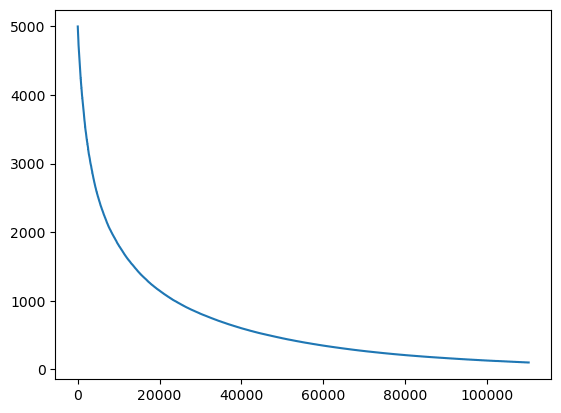

In [91]:
import matplotlib.pyplot as plt


print(filtered_df[filtered_df["wc"] > 4000].shape)
plt.plot(
    np.arange(len(filtered_df)),
    filtered_df["wc"].values,
)

In [92]:
filtered_df[(
    filtered_df["wc"] < 50
)][["title", "wc"]]

,title,wc


In [93]:
filtered_df.shape

(110181, 4)

In [95]:
filtered_df["wc"].sum() / 8000

9683.9265

In [60]:
i = 2000
topics[i: i+50]

NameError: name 'topics' is not defined

In [70]:
filtered_df.set_index("title").loc["wankel engine"]["text"]

'The Wankel engine is a type of internal combustion engine using an eccentric rotary design to convert pressure into rotating motion.\n\nCompared to the reciprocating piston engine, the Wankel engine has more uniform torque; less vibration; and, for a given power, is more compact and weighs less.\n\nThe rotor, which creates the turning motion, is similar in shape to a Reuleaux triangle, except the sides have less curvature. Wankel engines deliver three power pulses per revolution of the rotor using the Otto cycle. However, the output shaft uses toothed gearing to turn three times faster giving one power pulse per revolution. This can be seen in the animation below. In one revolution, the rotor experiences power pulses and exhausts gas simultaneously, while the four stages of the Otto cycle occur at separate times. For comparison, in a two-stroke piston engine there is one power pulse for each crankshaft revolution (as with a Wankel engine output shaft) and, in a four-stroke piston engi

In [ ]:
df.set_index("title").loc["Gradient-enhanced kriging"]["text"]